<h1 align=center> Proceso de ETL <sub align=center> (ETL PROCESS)</sub></h1>

In [ ]:
# Instalacion de librerias de ser necesario
%pip install seaborn

In [214]:
# Importacion de librerias 
import pandas as pd
import seaborn as sns
import numpy as np

<h2 align=Center> Extraccion de datos<sub>/Data extraction</sub></h2>

<h3 align=left> Rutas /<sub> Paths</sub> </h3>

In [215]:
# Ubicaciones de los archivos 
Ruta_data_hechos = 'Database/homicidios.xlsx - HECHOS.csv'
Ruta_data_victimas = 'Database/homicidios.xlsx - VICTIMAS.csv'

In [216]:
# Lectura del la base de datos de homicidios y primer chequeo
hechos_database = pd.read_csv(Ruta_data_hechos)
hechos_database.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,1/1/2016,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,1/2/2016,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,1/3/2016,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


In [217]:
# Observacion de informacion del df para tener en cuenta los nombres de las columnas
hechos_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    int64  
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    int64  
 4   MM                     696 non-null    int64  
 5   DD                     696 non-null    int64  
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    int64  
 15  XY (CA

In [218]:
# Renombramiento de las columnas
hechos_database.rename(columns={'ID':'Id', 'N_VICTIMAS': 'Num_Victimas', 'FECHA':'Fecha', 'AAAA':'Año', 'MM':'Mes', 'DD':'Dia', 'HORA':'Horas', 
                                  'HH':'Hora','LUGAR_DEL_HECHO':'Lugar_del_hecho', 'TIPO_DE_CALLE':'Tipo_calle','Dirección Normalizada':'Direccion',
                                  'COMUNA':'Comuna','XY (CABA)': 'Coordenadas','pos x':'Longitud ','pos y':'Latitud','PARTICIPANTES':'Participantes',
                                  'VICTIMA':'Victima', 'ACUSADO':'Acusado'}, inplace = True)

<h2> Conteo de nulos </h2>

In [219]:
# Presencia de nulos en cada columna
hechos_database.isna().any()


Id                 False
Num_Victimas       False
Fecha              False
Año                False
Mes                False
Dia                False
Horas              False
Hora               False
Lugar_del_hecho    False
Tipo_calle         False
Calle               True
Altura              True
Cruce               True
Direccion           True
Comuna             False
Coordenadas        False
Longitud           False
Latitud            False
Participantes      False
Victima            False
Acusado            False
dtype: bool

In [220]:
# Conteo de nulos en cada columna
hechos_database.isna().sum()

Id                   0
Num_Victimas         0
Fecha                0
Año                  0
Mes                  0
Dia                  0
Horas                0
Hora                 0
Lugar_del_hecho      0
Tipo_calle           0
Calle                1
Altura             567
Cruce              171
Direccion            8
Comuna               0
Coordenadas          0
Longitud             0
Latitud              0
Participantes        0
Victima              0
Acusado              0
dtype: int64

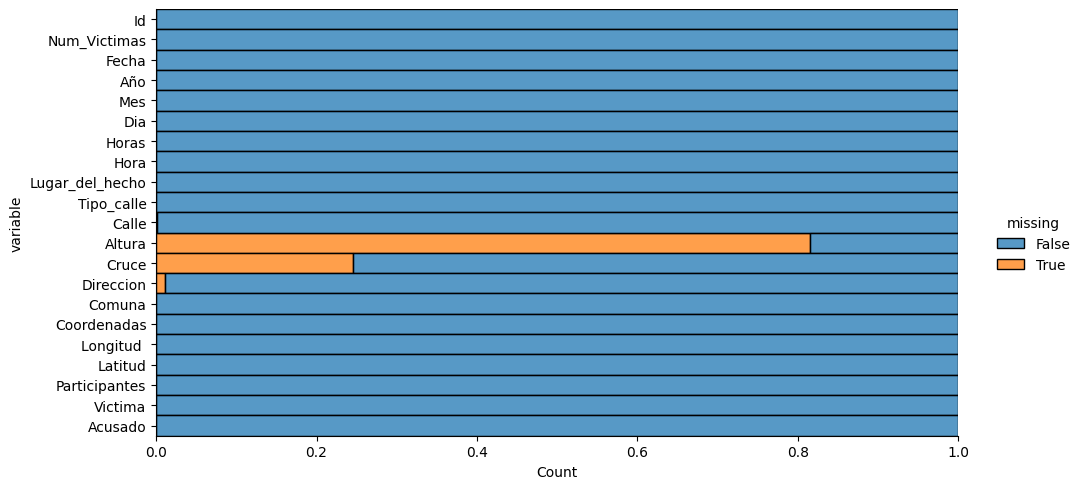

In [221]:
# Proporcion de valores por variable data de items
(
    hechos_database
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

<Axes: >

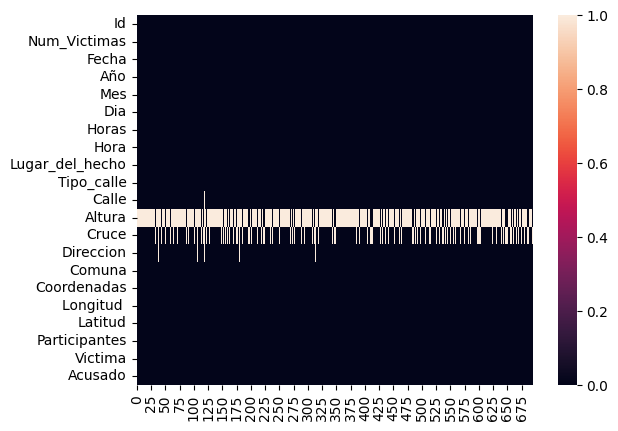

In [222]:
# Visualizacion de los valores nulos / visualization of missing values
(
    hechos_database
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

In [223]:
# Chequeo a columnas 'Tipo_calle' en busca de elementos mal nombrados
hechos_database['Tipo_calle'].unique()

array(['AVENIDA', 'GRAL PAZ', 'CALLE', 'AUTOPISTA'], dtype=object)

In [224]:
# Chequeo a columnas 'Hora' en busca de elementos mal nombrados
hechos_database['Hora'].unique()

array(['4', '1', '7', '0', '5', '18', '19', '15', '11', '22', '16', '9',
       '23', '6', '10', '17', '12', '8', '20', '21', '14', '3', '2', '13',
       'SD'], dtype=object)

In [225]:
# Chequeo a columnas 'Victima' en busca de elementos mal nombrados
hechos_database['Victima'].value_counts()

Victima
MOTO           295
PEATON         264
AUTO            83
BICICLETA       29
SD               9
CARGAS           7
PASAJEROS        5
MOVIL            2
OBJETO FIJO      1
PEATON_MOTO      1
Name: count, dtype: int64

In [226]:
# Chequeo a columnas 'Acusado' en busca de elementos mal nombrados
hechos_database['Acusado'].value_counts()

Acusado
AUTO           204
PASAJEROS      173
CARGAS         146
OBJETO FIJO     62
MOTO            57
SD              23
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: count, dtype: int64

In [227]:
# Renombre de todos los elementos 'GRAL PAZ' por 'AVENIDA' 
hechos_database['Tipo_calle'] = hechos_database['Tipo_calle'].replace({'GRAL PAZ':'AVENIDA'})

# Renombre de elemento 'PEATON_MOTO' por 'PEATON'
hechos_database['Victima'] = hechos_database['Victima'].replace({'PEATON_MOTO': 'PEATON'})

In [228]:
# Transformacion de los elemento de la columnas 'Hora' a tipo Int64 
hechos_database['Hora'] = pd.to_numeric(hechos_database ['Hora'], errors="coerce")
hechos_database['Hora'] = hechos_database['Hora'].astype('Int64')

In [229]:
# Eliminacion de columna "Altura"
homicide_database = hechos_database.drop({"Altura",'Cruce'}, axis=1)
homicide_database.columns

Index(['Id', 'Num_Victimas', 'Fecha', 'Año', 'Mes', 'Dia', 'Horas', 'Hora',
       'Lugar_del_hecho', 'Tipo_calle', 'Calle', 'Direccion', 'Comuna',
       'Coordenadas', 'Longitud ', 'Latitud', 'Participantes', 'Victima',
       'Acusado'],
      dtype='object')

In [230]:
# Precensia de elementos Duplicados
hechos_database.duplicated().sum()

0

In [231]:
hechos_database.isna().sum()

Id                   0
Num_Victimas         0
Fecha                0
Año                  0
Mes                  0
Dia                  0
Horas                0
Hora                 1
Lugar_del_hecho      0
Tipo_calle           0
Calle                1
Altura             567
Cruce              171
Direccion            8
Comuna               0
Coordenadas          0
Longitud             0
Latitud              0
Participantes        0
Victima              0
Acusado              0
dtype: int64

In [232]:
# Renombre de elemento 'PEATON_MOTO' por 'PEATON'
hechos_database['Calle'] = hechos_database['Calle'].replace({None: 'SD'})


<h2>Victimas</h2>

In [233]:
victimas_database = pd.read_csv(Ruta_data_victimas)

In [234]:
victimas_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_hecho             717 non-null    object
 1   FECHA                717 non-null    object
 2   AAAA                 717 non-null    int64 
 3   MM                   717 non-null    int64 
 4   DD                   717 non-null    int64 
 5   ROL                  717 non-null    object
 6   VICTIMA              717 non-null    object
 7   SEXO                 717 non-null    object
 8   EDAD                 717 non-null    object
 9   FECHA_FALLECIMIENTO  717 non-null    object
dtypes: int64(3), object(7)
memory usage: 56.1+ KB


In [235]:
# Renombramiento de las columnas
victimas_database.rename(columns={'ID_hecho':'Id','FECHA':'Fecha', 'AAAA':'Año', 'MM':'Mes', 'DD':'Dia', 'ROL':'Rol',
                                  'VICTIMA':'Victima', 'SEXO':'Sexo','EDAD':'Edad','FECHA_FALLECIMIENTO':'Fecha_fallecimiento'}, inplace = True)
victimas_database.head(2)

,Id,Fecha,Año,Mes,Dia,Rol,Victima,Sexo,Edad,Fecha_fallecimiento
0,2016-0001,1/1/2016,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016
1,2016-0002,1/2/2016,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,1/2/2016


In [236]:
victimas_database = victimas_database.drop({'Fecha','Año','Mes','Dia','Victima','Fecha_fallecimiento'}, axis = 1)
victimas_database.head(2)

,Id,Rol,Sexo,Edad
0,2016-0001,CONDUCTOR,MASCULINO,19
1,2016-0002,CONDUCTOR,MASCULINO,70


In [237]:
# Presencia de nulos en cada columna
victimas_database.isna().any()

Id      False
Rol     False
Sexo    False
Edad    False
dtype: bool

In [238]:
victimas_database.isnull().sum()

Id      0
Rol     0
Sexo    0
Edad    0
dtype: int64

In [239]:
victimas_database

,Id,Rol,Sexo,Edad
0,2016-0001,CONDUCTOR,MASCULINO,19
1,2016-0002,CONDUCTOR,MASCULINO,70
2,2016-0003,CONDUCTOR,MASCULINO,30
3,2016-0004,CONDUCTOR,MASCULINO,18
4,2016-0005,CONDUCTOR,MASCULINO,29
...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43
715,2021-0095,CONDUCTOR,MASCULINO,27


<h2> Merge</h2>

In [240]:
data_siniestros = homicide_database.merge(victimas_database,on='Id',how='left')
data_siniestros.head(4)

,Id,Num_Victimas,Fecha,Año,Mes,Dia,Horas,Hora,Lugar_del_hecho,Tipo_calle,...,Comuna,Coordenadas,Longitud,Latitud,Participantes,Victima,Acusado,Rol,Sexo,Edad
0,2016-0001,1,1/1/2016,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19
1,2016-0002,1,1/2/2016,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,...,9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70
2,2016-0003,1,1/3/2016,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30
3,2016-0004,1,1/10/2016,2016,1,10,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18


In [241]:
data_siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               717 non-null    object
 1   Num_Victimas     717 non-null    int64 
 2   Fecha            717 non-null    object
 3   Año              717 non-null    int64 
 4   Mes              717 non-null    int64 
 5   Dia              717 non-null    int64 
 6   Horas            717 non-null    object
 7   Hora             716 non-null    Int64 
 8   Lugar_del_hecho  717 non-null    object
 9   Tipo_calle       717 non-null    object
 10  Calle            716 non-null    object
 11  Direccion        708 non-null    object
 12  Comuna           717 non-null    int64 
 13  Coordenadas      717 non-null    object
 14  Longitud         717 non-null    object
 15  Latitud          717 non-null    object
 16  Participantes    717 non-null    object
 17  Victima          717 non-null    ob

In [242]:
data_siniestros.isna().sum()

Id                 0
Num_Victimas       0
Fecha              0
Año                0
Mes                0
Dia                0
Horas              0
Hora               1
Lugar_del_hecho    0
Tipo_calle         0
Calle              1
Direccion          9
Comuna             0
Coordenadas        0
Longitud           0
Latitud            0
Participantes      0
Victima            0
Acusado            0
Rol                0
Sexo               0
Edad               0
dtype: int64

In [243]:
data_siniestros['Direccion'] = data_siniestros['Direccion'].replace({None: 'SD'})

In [244]:
data_siniestros.columns

Index(['Id', 'Num_Victimas', 'Fecha', 'Año', 'Mes', 'Dia', 'Horas', 'Hora',
       'Lugar_del_hecho', 'Tipo_calle', 'Calle', 'Direccion', 'Comuna',
       'Coordenadas', 'Longitud ', 'Latitud', 'Participantes', 'Victima',
       'Acusado', 'Rol', 'Sexo', 'Edad'],
      dtype='object')

In [245]:
data_siniestros ["Edad"].dropna()

0      19
1      70
2      30
3      18
4      29
       ..
712    18
713    43
714    27
715    60
716    53
Name: Edad, Length: 717, dtype: object

In [246]:
data_siniestros['Edad'] = data_siniestros['Edad'].replace({'SD': None})

In [247]:
#Cambio la columna edad a numerico y luego a tipo entero
data_siniestros ["Edad"] = pd.to_numeric(data_siniestros["Edad"], errors="coerce")
data_siniestros ["Edad"] = data_siniestros["Edad"].astype("Int64")

In [248]:
# Definir los límites de rango de edad 
bins = [0, 20, 40, 60, 80, float('inf')]  # Ensure all elements are numeric

# Definir etiquetas para cada rango de edad.
labels = ["Menos de 20", "Entre 21 y 40", "Entre 41 y 60", "Entre 61 y 80", "Más de 80"]

# Crear la columna de rango de edad
data_siniestros['Rango_etario'] = pd.cut(data_siniestros['Edad'], bins=bins, labels=labels, right=False)
data_siniestros.head(3)

,Id,Num_Victimas,Fecha,Año,Mes,Dia,Horas,Hora,Lugar_del_hecho,Tipo_calle,...,Coordenadas,Longitud,Latitud,Participantes,Victima,Acusado,Rol,Sexo,Edad,Rango_etario
0,2016-0001,1,1/1/2016,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,Menos de 20
1,2016-0002,1,1/2/2016,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,...,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,Entre 61 y 80
2,2016-0003,1,1/3/2016,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,Entre 21 y 40


In [249]:
def convert_date(date_str):
    try:
        # Intentar con diferentes formatos de orden de fechas
        return pd.to_datetime(date_str, format="%d/%m/%Y")
    except ValueError:
        try:
            return pd.to_datetime(date_str, format="%m/%d/%Y")
        except ValueError:
            # Manejo de forrmatos que no entren en los antes descritos
            return None

data_siniestros['Fecha'] = data_siniestros['Fecha'].apply(convert_date)

In [250]:
# Creacion de la columna `Dia_nombre` con el nombre del día 
data_siniestros["Dia_nombre"] = data_siniestros["Fecha"].dt.strftime("%A")

# Creacion un diccionario para modificar los nombres de los dias de la semana en español
Semana ={ "Monday": "Lunes","Tuesday": "Martes","Wednesday": "Miercoles","Thursday": "Jueves", "Friday":"Viernes",
         "Saturday": "Sabado", "Sunday": "Domingo"}
         
data_siniestros["Dia_nombre"] = data_siniestros["Dia_nombre"].replace(Semana)

In [251]:
data_siniestros

,Id,Num_Victimas,Fecha,Año,Mes,Dia,Horas,Hora,Lugar_del_hecho,Tipo_calle,...,Longitud,Latitud,Participantes,Victima,Acusado,Rol,Sexo,Edad,Rango_etario,Dia_nombre
0,2016-0001,1,2016-01-01,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,Menos de 20,Viernes
1,2016-0002,1,2016-02-01,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,...,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,Entre 61 y 80,Lunes
2,2016-0003,1,2016-03-01,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,Entre 21 y 40,Martes
3,2016-0004,1,2016-10-01,2016,1,10,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,Menos de 20,Sabado
4,2016-0005,1,2016-01-21,2016,1,21,5:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,Entre 21 y 40,Jueves
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,Menos de 20,Lunes
713,2021-0094,1,2021-12-20,2021,12,20,1:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,Entre 41 y 60,Lunes
714,2021-0095,1,2021-12-30,2021,12,30,0:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,Entre 21 y 40,Jueves
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,Entre 61 y 80,Miercoles


In [252]:
# Guardo el DataFrame como archivo CSV en la ruta especificada
data_siniestros.to_csv("Database/Data_siniestros.csv", index=False)